In [14]:
import pandas as pd
import logging
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from nst_scraper import nst_on_ice_scraper

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Set pandas to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [15]:
def filter_players_by_toi(df, min_toi=400):
    """
    Filters the input DataFrame to include only players with a total time on ice (toi) of at least min_toi.

    Parameters:
        df (pd.DataFrame): The DataFrame containing player statistics.
        min_toi (int, optional): The minimum total time on ice required to include a player. Defaults to 400.

    Returns:
        pd.DataFrame: A filtered DataFrame with players having toi >= min_toi.
    """
    filtered_df = df[df['toi'] >= min_toi]
    return filtered_df


In [18]:
def process_player_stats(season, startdate='', enddate='', sit='all', stdoi='std', pos='S', loc='B', rate='y', min_toi=400):
    """
    Processes player statistics for a given season by scraping data, filtering players by TOI,
    and calculating individual expected goals per 60 minutes (ixG/60).

    Parameters:
        season (int): The season year (e.g., 20222023).
        startdate (str, optional): The start date for data scraping. Defaults to ''.
        enddate (str, optional): The end date for data scraping. Defaults to ''.
        sit (str, optional): Situation type to filter by (e.g., '5v5', 'all'). Defaults to 'all'.
        stdoi (str, optional): Statistic type of interest. Use 'std' for individual stats, 'oi' for on-ice stats, or 'g' for goalies. Defaults to 'std'.
        pos (str, optional): Position type. Use 'S' for skaters or 'G' for goalies. Defaults to 'S'.
        loc (str, optional): Location filter. Use 'B' for both home and away, 'H' for home, or 'A' for away. Defaults to 'B'.
        rate (str, optional): Stat type, rate or count. Use 'n' or 'y'. Defaults to 'y'.
        min_toi (int, optional): The minimum total time on ice required to include a player. Defaults to 400.

    Returns:
        pd.DataFrame: A filtered DataFrame with players having toi >= min_toi.
    """
    # Scrape player statistics for the given season
    df = nst_on_ice_scraper(
        fromseason=season,
        thruseason=season,
        startdate=startdate,
        enddate=enddate,
        sit=sit,
        stdoi=stdoi,
        pos=pos,
        loc=loc,
        rate=rate
    )
    
    # Filter players based on minimum TOI
    filtered_df = filter_players_by_toi(df, min_toi)
    
    return filtered_df

In [19]:
ind_h_df = process_player_stats(20232024, sit='5v5', stdoi='std', loc='H', min_toi=400)
ind_h_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,41,706.08,17.22,0.08,0.68,0.34,0.34,0.76,26.47,4.16,2.04,0.14,9.01,6.20,2.63,0.34,0.08,0.34,0.34,0.17,0.17,0.0,0.0,0.00,1.36,0.76,3.23,3.82,2.97,0.00,0.00,-
3,Brent Burns,CAR,D,41,620.52,15.13,0.19,0.58,0.29,0.29,0.77,26.67,5.90,3.28,0.22,18.08,9.67,4.35,0.39,0.29,1.74,0.77,0.39,0.39,0.0,0.0,0.29,2.71,1.64,1.35,1.64,3.19,0.00,0.00,-
6,Joe Pavelski,DAL,C,41,551.95,13.46,0.87,1.41,0.98,0.43,2.28,67.74,8.37,10.39,0.94,13.81,11.09,8.91,5.11,0.54,1.09,0.65,0.33,0.33,0.0,0.0,0.54,2.94,1.41,3.48,2.83,3.04,16.20,14.57,5.72
8,Alex Ovechkin,WSH,L,39,560.10,14.36,0.86,0.64,0.64,0.00,1.50,60.87,8.57,10.00,0.94,18.85,12.96,9.64,3.96,0.86,2.14,0.86,0.43,0.43,0.0,0.0,0.43,2.04,1.61,8.89,1.71,1.07,0.00,0.21,0.00
9,Evgeni Malkin,PIT,C,41,573.17,13.98,0.84,1.05,0.84,0.21,1.88,78.26,6.39,13.11,0.74,12.46,9.21,7.96,3.04,0.21,0.94,2.93,1.36,1.36,0.0,0.0,2.09,2.30,4.50,0.94,3.45,2.51,19.16,20.52,5.05


In [20]:
ind_a_df = process_player_stats(20232024, sit='5v5', stdoi='std', loc='A', min_toi=400)
ind_a_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,41,697.75,17.02,0.09,0.52,0.17,0.34,0.60,25.93,4.30,2.00,0.18,11.95,7.40,3.10,0.17,0.09,0.95,1.72,0.86,0.86,0.0,0.0,0.00,1.03,0.43,3.18,4.04,4.39,0.00,0.00,-
3,Brent Burns,CAR,D,41,656.17,16.00,0.27,0.55,0.18,0.37,0.82,26.47,6.68,4.11,0.23,21.03,11.43,4.66,0.55,0.27,2.29,0.91,0.46,0.46,0.0,0.0,0.18,1.37,1.19,1.83,1.46,3.57,0.00,0.00,-
6,Joe Pavelski,DAL,C,41,533.37,13.01,0.45,1.35,0.56,0.79,1.80,69.57,5.40,8.33,0.67,10.35,7.65,6.52,3.15,0.11,1.01,1.12,0.56,0.56,0.0,0.0,1.57,2.70,0.67,4.27,2.14,3.71,16.87,16.54,5.68
8,Alex Ovechkin,WSH,L,40,544.20,13.60,0.66,0.99,0.55,0.44,1.65,83.33,7.28,9.09,0.62,16.43,10.58,7.83,2.98,0.55,1.54,0.66,0.33,0.33,0.0,0.0,0.66,1.43,0.77,8.05,1.65,1.10,0.00,0.00,-
9,Evgeni Malkin,PIT,C,41,584.28,14.25,1.13,1.33,0.92,0.41,2.46,70.59,5.96,18.97,0.62,11.71,8.42,6.98,3.49,0.31,1.03,3.08,1.44,1.44,0.0,0.0,0.72,1.75,3.90,1.85,4.11,1.33,18.89,20.44,4.93


In [21]:
oi_h_df = process_player_stats(20232024, sit='5v5', stdoi='oi', loc='H', min_toi=100)
oi_h_df.head()
oi_a_df = process_player_stats(20232024, sit='5v5', stdoi='oi', loc='A', min_toi=100)
oi_a_df.head()


,player,team,position,gp,toi,toi/gp,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,DAL,D,41,697.75,17.02,62.26,57.70,51.90,44.37,41.71,51.55,28.63,28.89,49.78,2.32,2.58,47.37,2.58,2.26,53.36,28.63,26.74,51.71,11.01,9.89,52.67,1.20,1.55,43.75,23.50,22.47,51.12,0.80,1.03,43.75,53.66,53.29,50.17,0.75,0.37,66.67,8.11,91.07,0.992,7.05,12.64,8.00,42.91,46.86,18.32,18.75,20.81,46.81
1,Jeff Carter,PIT,C,34,313.47,9.22,50.15,62.59,44.48,35.03,44.79,43.88,24.69,30.05,45.10,0.96,1.72,35.71,1.85,2.66,40.96,22.78,28.14,44.74,9.19,12.63,42.11,0.38,1.15,25.00,18.12,20.67,46.71,0.51,0.00,100.00,34.84,61.93,36.00,0.28,0.83,25.00,3.88,94.27,0.981,4.02,11.68,24.12,50.34,14.29,6.51,15.70,37.90,14.66
2,Zach Parise,COL,L,15,167.60,11.17,58.71,66.59,46.86,41.53,45.47,47.74,31.50,31.86,49.72,0.72,3.58,16.67,2.24,2.54,46.80,23.99,24.70,49.26,11.10,10.74,50.82,0.72,2.51,22.22,17.18,18.62,48.00,0.00,0.95,0.00,47.57,59.47,44.44,0.00,0.52,0.00,2.27,88.76,0.910,7.52,11.81,8.23,55.49,47.73,12.89,17.90,16.83,43.37
3,Brent Burns,CAR,D,41,656.17,16.00,75.90,52.76,58.99,51.76,38.68,57.23,32.55,26.52,55.11,3.11,2.10,59.65,3.12,2.30,57.57,31.73,24.69,56.24,13.53,10.24,56.92,2.19,0.91,70.59,24.26,19.26,55.74,0.98,1.22,44.44,65.25,45.30,59.02,0.26,0.40,40.00,9.55,92.07,1.016,7.32,12.62,7.04,44.26,50.96,19.20,22.86,20.03,48.95
4,Corey Perry,CHI,R,10,100.90,10.09,44.60,66.60,40.11,33.30,45.19,42.42,22.00,27.95,44.05,2.97,3.57,45.45,1.88,2.42,43.71,20.22,26.76,43.04,5.95,8.92,40.00,0.00,1.78,0.00,19.03,23.79,44.44,2.38,1.59,60.00,40.37,61.84,39.50,1.72,0.86,66.67,13.51,87.23,1.007,6.54,11.30,9.51,53.52,40.74,16.06,15.46,18.43,46.55


In [23]:
ind_h_df['icf_delta'] = ind_h_df['icf/60'] - ind_h_df['iff/60']
ind_a_df['icf_delta'] = ind_a_df['icf/60'] - ind_a_df['iff/60']
oi_h_df['cf_delta'] = oi_h_df['cf/60'] - oi_h_df['ff/60']
oi_a_df['cf_delta'] = oi_a_df['cf/60'] - oi_a_df['ff/60']


In [24]:
merged_h_df = pd.merge(ind_h_df, oi_h_df, on='player', suffixes=('_ind', '_oi'))
merged_a_df = pd.merge(ind_a_df, oi_a_df, on='player', suffixes=('_ind', '_oi'))
merged_h_df.head()

,player,team_ind,position_ind,gp_ind,toi_ind,toi/gp_ind,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%,icf_delta,team_oi,position_oi,gp_oi,toi_oi,toi/gp_oi,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%,cf_delta
0,Ryan Suter,DAL,D,41,706.08,17.22,0.08,0.68,0.34,0.34,0.76,26.47,4.16,2.04,0.14,9.01,6.20,2.63,0.34,0.08,0.34,0.34,0.17,0.17,0.0,0.0,0.00,1.36,0.76,3.23,3.82,2.97,0.00,0.00,-,2.81,DAL,D,41,706.08,17.22,58.89,54.38,51.99,42.66,40.87,51.07,28.98,27.36,51.43,2.89,2.04,58.62,2.65,2.27,53.86,26.85,22.60,54.30,12.49,9.69,56.32,1.53,1.27,54.55,19.15,17.22,52.65,1.47,0.68,68.42,51.55,48.12,51.72,0.37,0.37,50.00,9.97,92.55,1.025,7.14,10.88,7.22,45.04,49.70,18.61,16.74,17.51,51.53,16.23
1,Brent Burns,CAR,D,41,620.52,15.13,0.19,0.58,0.29,0.29,0.77,26.67,5.90,3.28,0.22,18.08,9.67,4.35,0.39,0.29,1.74,0.77,0.39,0.39,0.0,0.0,0.29,2.71,1.64,1.35,1.64,3.19,0.00,0.00,-,8.41,CAR,D,41,620.52,15.13,76.48,47.77,61.56,53.28,35.29,60.15,34.71,23.98,59.14,2.90,2.03,58.82,3.01,2.04,59.65,34.62,19.44,64.04,13.63,8.12,62.67,1.64,0.87,65.38,27.98,15.08,64.97,1.16,1.29,47.37,63.97,44.00,59.25,0.56,0.28,66.67,8.36,91.53,0.999,8.32,10.15,7.25,47.96,53.42,21.56,16.73,17.02,55.89,23.20
2,Joe Pavelski,DAL,C,41,551.95,13.46,0.87,1.41,0.98,0.43,2.28,67.74,8.37,10.39,0.94,13.81,11.09,8.91,5.11,0.54,1.09,0.65,0.33,0.33,0.0,0.0,0.54,2.94,1.41,3.48,2.83,3.04,16.20,14.57,5.72,2.72,DAL,C,41,551.95,13.46,64.79,54.46,54.33,46.53,39.57,54.04,32.07,25.65,55.56,3.37,2.39,58.49,2.81,2.26,55.37,29.89,21.41,58.26,12.18,8.37,59.26,1.63,1.30,55.56,23.63,17.39,57.60,1.88,1.30,59.09,56.21,50.56,52.65,0.47,0.16,75.00,10.51,90.68,1.012,10.65,12.18,9.35,44.68,53.26,21.74,17.39,19.57,52.63,18.26
3,Alex Ovechkin,WSH,L,39,560.10,14.36,0.86,0.64,0.64,0.00,1.50,60.87,8.57,10.00,0.94,18.85,12.96,9.64,3.96,0.86,2.14,0.86,0.43,0.43,0.0,0.0,0.43,2.04,1.61,8.89,1.71,1.07,0.00,0.21,0.00,5.89,WSH,L,39,560.10,14.36,63.10,64.49,49.45,44.46,47.03,48.59,30.10,31.07,49.21,2.46,3.11,44.23,2.90,3.11,48.26,28.92,29.57,49.45,12.43,11.89,51.10,1.39,2.14,39.39,22.00,23.57,48.28,1.29,0.71,64.29,60.97,46.42,56.77,0.15,0.62,20.00,8.19,90.00,0.982,16.39,13.50,3.32,44.88,83.15,30.74,18.64,10.61,74.35,18.64
4,Evgeni Malkin,PIT,C,41,573.17,13.98,0.84,1.05,0.84,0.21,1.88,78.26,6.39,13.11,0.74,12.46,9.21,7.96,3.04,0.21,0.94,2.93,1.36,1.36,0.0,0.0,2.09,2.30,4.50,0.94,3.45,2.51,19.16,20.52,5.05,3.25,PIT,C,41,573.17,13.98,61.24,63.65,49.04,43.34,45.75,48.65,29.00,30.46,48.77,2.41,2.30,51.11,2.69,2.79,49.12,27.85,30.46,47.76,11.62,11.83,49.55,1.05,1.67,38.46,21.63,24.84,46.55,1.40,0.14,90.91,51.11,46.27,52.48,0.45,0.76,37.50,8.30,92.44,1.007,9.21,11.83,4.40,51.71,67.69,18.42,18.84,11.83,60.90,17.90


In [26]:
# drop Defense
merged_h_df = merged_h_df[merged_h_df['position_ind'] != 'D']
merged_a_df = merged_a_df[merged_a_df['position_ind'] != 'D']

Number of common players: 388
Players only in Home DataFrame: {'Cole Perfetti', 'Kevin Shattenkirk', 'Casey Cizikas', 'Tyler Johnson', 'Nico Sturm', 'Brett Howden', 'Simon Holmstrom', 'Michael Carcone', 'Brandon Tanev', 'Frederick Gaudreau', 'Andrei Svechnikov', 'Mike Hoffman', 'Connor Zary', 'Valeri Nichushkin', 'Cal Clutterbuck', 'Aaron Ekblad', 'Michael McCarron', 'Nikita Zadorov', 'Vladimir Tarasenko', 'Johnathan Kovacevic', 'Nick Cousins', 'Jon Merrill'}
Players only in Away DataFrame: {'Alexander Wennberg', 'Calvin de Haan', 'Pius Suter', 'Dakota Joshua', 'Shea Theodore', 'Connor Murphy', 'Leo Carlsson', 'Brendan Smith', 'Dante Fabbro', 'Dmitri Voronkov', 'Jordan Harris', 'Joel Armia', 'Tommy Novak', 'Justin Barron', 'David Kampf', 'Calen Addison', 'Timothy Liljegren', 'Cam Atkinson', 'Alexander Holtz', 'Lukas Reichel', 'Nic Dowd', 'Boone Jenner', 'Jaden Schwartz'}
Number of players after filtering: 389
Linear Regression Equation: y = 0.81x + 0.97
R-squared: 0.7524


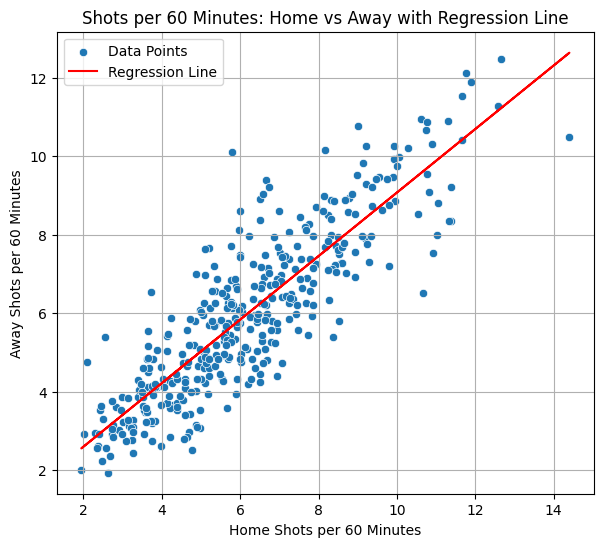

In [35]:
# Step 1: Identify Common Players
common_players = set(ind_h_df['player']).intersection(set(ind_a_df['player']))
print(f"Number of common players: {len(common_players)}")

# Step 2: Identify Mismatched Players
only_in_h = set(ind_h_df['player']) - set(ind_a_df['player'])
print(f"Players only in Home DataFrame: {only_in_h}")

only_in_a = set(ind_a_df['player']) - set(ind_h_df['player'])
print(f"Players only in Away DataFrame: {only_in_a}")

# Step 3: Drop Mismatched Players
ind_h_df_filtered = ind_h_df[ind_h_df['player'].isin(common_players)].reset_index(drop=True)
ind_a_df_filtered = ind_a_df[ind_a_df['player'].isin(common_players)].reset_index(drop=True)

print(f"Number of players after filtering: {len(ind_h_df_filtered)}")

# Step 4: Linear Regression
X = ind_h_df_filtered['shots/60'].values.reshape(-1, 1)
y = ind_a_df_filtered['shots/60'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_squared:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ind_h_df_filtered['shots/60'], y=ind_a_df_filtered['shots/60'], label='Data Points')
plt.plot(ind_h_df_filtered['shots/60'], model.predict(X), color='red', label='Regression Line')
plt.title('Shots per 60 Minutes: Home vs Away with Regression Line')
plt.xlabel('Home Shots per 60 Minutes')
plt.ylabel('Away Shots per 60 Minutes')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='major')
plt.show()

Number of common players: 388
Players only in Home DataFrame: {'Cole Perfetti', 'Kevin Shattenkirk', 'Casey Cizikas', 'Tyler Johnson', 'Nico Sturm', 'Brett Howden', 'Simon Holmstrom', 'Michael Carcone', 'Brandon Tanev', 'Frederick Gaudreau', 'Andrei Svechnikov', 'Mike Hoffman', 'Connor Zary', 'Valeri Nichushkin', 'Cal Clutterbuck', 'Aaron Ekblad', 'Michael McCarron', 'Nikita Zadorov', 'Vladimir Tarasenko', 'Johnathan Kovacevic', 'Nick Cousins', 'Jon Merrill'}
Players only in Away DataFrame: {'Alexander Wennberg', 'Calvin de Haan', 'Pius Suter', 'Dakota Joshua', 'Shea Theodore', 'Connor Murphy', 'Leo Carlsson', 'Brendan Smith', 'Dante Fabbro', 'Dmitri Voronkov', 'Jordan Harris', 'Joel Armia', 'Tommy Novak', 'Justin Barron', 'David Kampf', 'Calen Addison', 'Timothy Liljegren', 'Cam Atkinson', 'Alexander Holtz', 'Lukas Reichel', 'Nic Dowd', 'Boone Jenner', 'Jaden Schwartz'}
Number of players after filtering: 389
Polynomial Regression Equation: y = 1.54 + 0.46x^1 + 0.06x^2 + -0.00x^3
R-squ

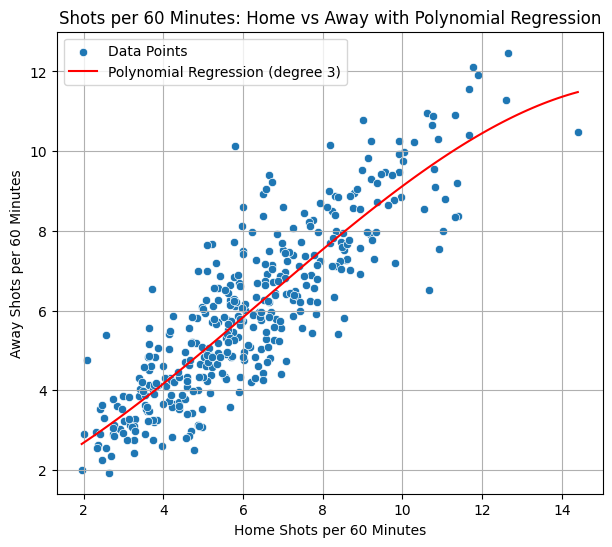

In [36]:
# Step 1: Identify Common Players
common_players = set(ind_h_df['player']).intersection(set(ind_a_df['player']))
print(f"Number of common players: {len(common_players)}")

# Step 2: Identify Mismatched Players
only_in_h = set(ind_h_df['player']) - set(ind_a_df['player'])
print(f"Players only in Home DataFrame: {only_in_h}")

only_in_a = set(ind_a_df['player']) - set(ind_h_df['player'])
print(f"Players only in Away DataFrame: {only_in_a}")

# Step 3: Drop Mismatched Players
ind_h_df_filtered = ind_h_df[ind_h_df['player'].isin(common_players)].reset_index(drop=True)
ind_a_df_filtered = ind_a_df[ind_a_df['player'].isin(common_players)].reset_index(drop=True)

print(f"Number of players after filtering: {len(ind_h_df_filtered)}")

# Step 4: Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

degree = 3  # You can change the degree as needed

X = ind_h_df_filtered['shots/60'].values.reshape(-1, 1)
y = ind_a_df_filtered['shots/60'].values

# Create a pipeline that first transforms the data to polynomial features and then fits a linear model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Retrieve coefficients
poly_features = model.named_steps['polynomialfeatures']
linear_model = model.named_steps['linearregression']
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Construct the polynomial equation string
polynomial_eq = f"y = {intercept:.2f}"
for i in range(1, degree + 1):
    polynomial_eq += f" + {coefficients[i]:.2f}x^{i}"

r_squared = model.score(X, y)

print(f"Polynomial Regression Equation: {polynomial_eq}")
print(f"R-squared: {r_squared:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ind_h_df_filtered['shots/60'], y=ind_a_df_filtered['shots/60'], label='Data Points')

# Generate a range of x values for plotting the polynomial curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Regression (degree {degree})')

plt.title('Shots per 60 Minutes: Home vs Away with Polynomial Regression')
plt.xlabel('Home Shots per 60 Minutes')
plt.ylabel('Away Shots per 60 Minutes')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='major')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume X and y are your features and target variables
X = ind_h_df_filtered['shots/60'].values.reshape(-1, 1)
y = ind_a_df_filtered['shots/60'].values

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict and calculate R-squared
    y_pred = model.predict(X_poly)
    r_squared = r2_score(y, y_pred)
    
    print(f"Degree {degree} Polynomial Regression R-squared: {r_squared:.4f}")

Degree 1 Polynomial Regression R-squared: 0.7524
Degree 2 Polynomial Regression R-squared: 0.7529
Degree 3 Polynomial Regression R-squared: 0.7540
Degree 4 Polynomial Regression R-squared: 0.7540
Degree 5 Polynomial Regression R-squared: 0.7556


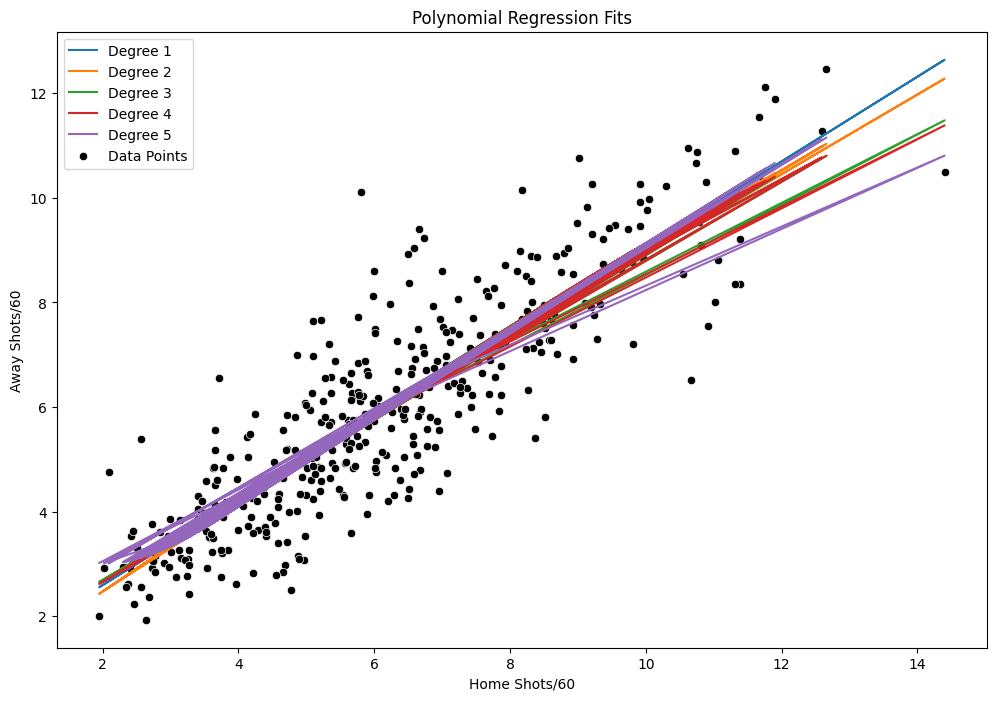

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(12, 8))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.plot(X, y_pred, label=f'Degree {degree}')

sns.scatterplot(x=X.flatten(), y=y, color='black', label='Data Points')
plt.title('Polynomial Regression Fits')
plt.xlabel('Home Shots/60')
plt.ylabel('Away Shots/60')
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"Degree {degree} Polynomial Regression - R² Train: {r2_train:.4f}, R² Test: {r2_test:.4f}")

Degree 1 Polynomial Regression - R² Train: 0.7592, R² Test: 0.7238
Degree 2 Polynomial Regression - R² Train: 0.7606, R² Test: 0.7197
Degree 3 Polynomial Regression - R² Train: 0.7609, R² Test: 0.7229
Degree 4 Polynomial Regression - R² Train: 0.7613, R² Test: 0.7203
Degree 5 Polynomial Regression - R² Train: 0.7623, R² Test: 0.7236


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    r_squared = r2_score(y, y_pred)
    
    print(f"Degree {degree} Polynomial Regression R-squared: {r_squared:.4f}")

Degree 1 Polynomial Regression R-squared: 0.7524
Degree 2 Polynomial Regression R-squared: 0.7529
Degree 3 Polynomial Regression R-squared: 0.7540
Degree 4 Polynomial Regression R-squared: 0.7540
Degree 5 Polynomial Regression R-squared: 0.7556


In [41]:
from sklearn.model_selection import cross_val_score

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    # Use negative mean squared error as scoring; multiply by -1 to interpret higher as better
    scores = cross_val_score(model, X_poly, y, scoring='r2', cv=5)
    
    print(f"Degree {degree} Polynomial Regression - Cross-Validated R²: {scores.mean():.4f} ± {scores.std():.4f}")

Degree 1 Polynomial Regression - Cross-Validated R²: 0.7431 ± 0.0407
Degree 2 Polynomial Regression - Cross-Validated R²: 0.7416 ± 0.0426
Degree 3 Polynomial Regression - Cross-Validated R²: 0.7413 ± 0.0435
Degree 4 Polynomial Regression - Cross-Validated R²: 0.7314 ± 0.0477
Degree 5 Polynomial Regression - Cross-Validated R²: 0.7100 ± 0.0750


Adjusted Shots/60 for Home: 5.02
Adjusted Shots/60 for Away: 4.97
     player  neutral_shots/60 location  adjusted_shots/60
0  Player A               4.5     Home           4.617548
1  Player B               5.0     Away           4.971801
2  Player C               6.5     Home           6.238790
3  Player D               3.8     Away           3.491454


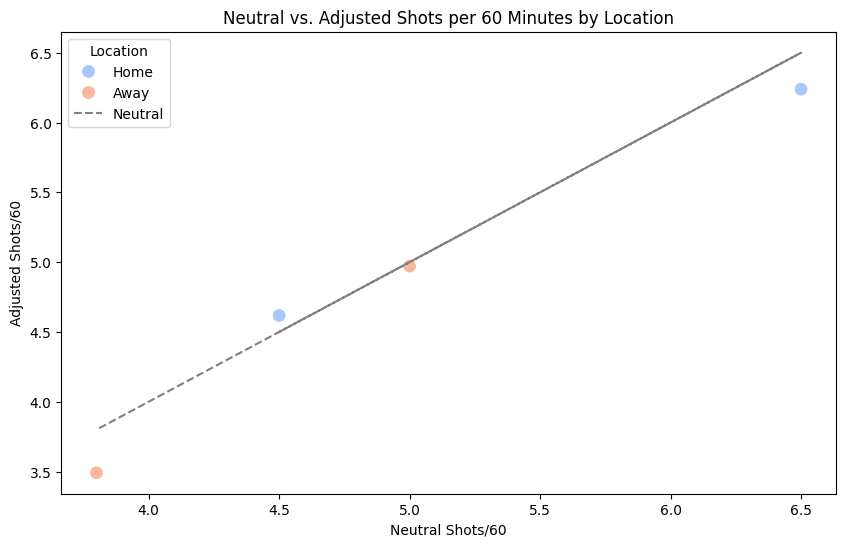

In [28]:
# ```sog_corr_calc.ipynb: apply_modifier```

def apply_modifier(neutral_shots_per_60, location, slope, intercept):
    location = location.lower()
    if location == 'home':
        adjusted_shots = slope * neutral_shots_per_60 + intercept
    elif location == 'away':
        if slope != 0:
            adjusted_shots = (neutral_shots_per_60 - intercept) / slope
        else:
            raise ValueError("Slope cannot be zero for adjustment.")
    else:
        raise ValueError("Location must be either 'Home' or 'Away'.")
    
    return adjusted_shots

# ```sog_corr_calc.ipynb: Applying the Modifier```

neutral_shots = 5.0
adjusted_home_shots = apply_modifier(neutral_shots, 'Home', slope, intercept)
adjusted_away_shots = apply_modifier(neutral_shots, 'Away', slope, intercept)
print(f"Adjusted Shots/60 for Home: {adjusted_home_shots:.2f}")
print(f"Adjusted Shots/60 for Away: {adjusted_away_shots:.2f}")

# ```sog_corr_calc.ipynb: Integrating Modifier with DataFrame```

df_neutral = pd.DataFrame({
    'player': ['Player A', 'Player B', 'Player C', 'Player D'],
    'neutral_shots/60': [4.5, 5.0, 6.5, 3.8],
    'location': ['Home', 'Away', 'Home', 'Away']
})

df_neutral['adjusted_shots/60'] = df_neutral.apply(
    lambda row: apply_modifier(
        neutral_shots_per_60=row['neutral_shots/60'],
        location=row['location'],
        slope=slope,
        intercept=intercept
    ),
    axis=1
)

print(df_neutral)

# ```sog_corr_calc.ipynb: Visualization```

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_neutral, x='neutral_shots/60', y='adjusted_shots/60', hue='location', palette='coolwarm', s=100)
plt.plot(df_neutral['neutral_shots/60'], df_neutral['neutral_shots/60'], color='gray', linestyle='--', label='Neutral')
plt.title('Neutral vs. Adjusted Shots per 60 Minutes by Location')
plt.xlabel('Neutral Shots/60')
plt.ylabel('Adjusted Shots/60')
plt.legend(title='Location')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree, X, y, cv=5, scoring='r2')
print(f"Decision Tree Regression - Cross-Validated R²: {scores.mean():.4f} ± {scores.std():.4f}")

Decision Tree Regression - Cross-Validated R²: 0.5379 ± 0.0822


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Random Forest Regression - Cross-Validated R²: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest Regression - Cross-Validated R²: 0.6518 ± 0.0481


In [45]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')
print(f"SVR Regression - Cross-Validated R²: {scores.mean():.4f} ± {scores.std():.4f}")

SVR Regression - Cross-Validated R²: 0.7303 ± 0.0396


In [29]:
# Filter out defensemen
merged_df = merged_df[merged_df['position_ind'] != 'D']

# Create scatter plot with 'toi_avg_ind' as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='icf_delta',
    y='shots/60',
    hue='toi_avg_ind',
    palette='viridis',
    size='toi_avg_ind',
    sizes=(40, 400),
    alpha=0.7
)
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual) with TOI Avg')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.legend(title='TOI Avg', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'merged_df' is not defined

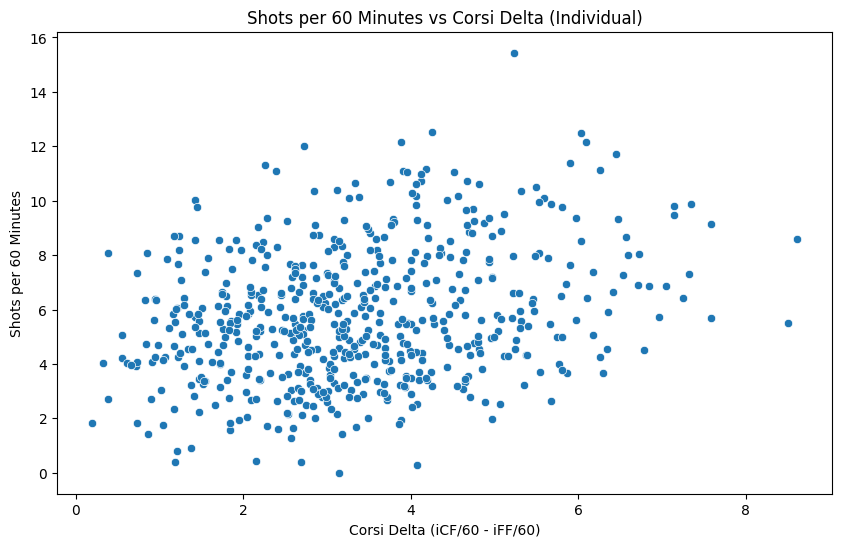

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_a_df, x='icf_delta', y='shots/60')
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual)')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.show()


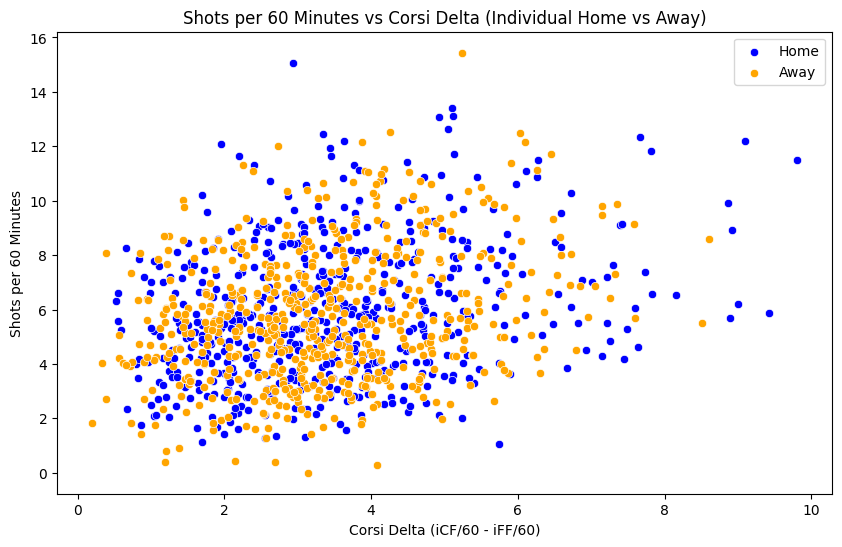

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ind_h_df, x='icf_delta', y='shots/60', label='Home', color='blue')
sns.scatterplot(data=ind_a_df, x='icf_delta', y='shots/60', label='Away', color='orange')
plt.title('Shots per 60 Minutes vs Corsi Delta (Individual Home vs Away)')
plt.xlabel('Corsi Delta (iCF/60 - iFF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.legend()
plt.show()


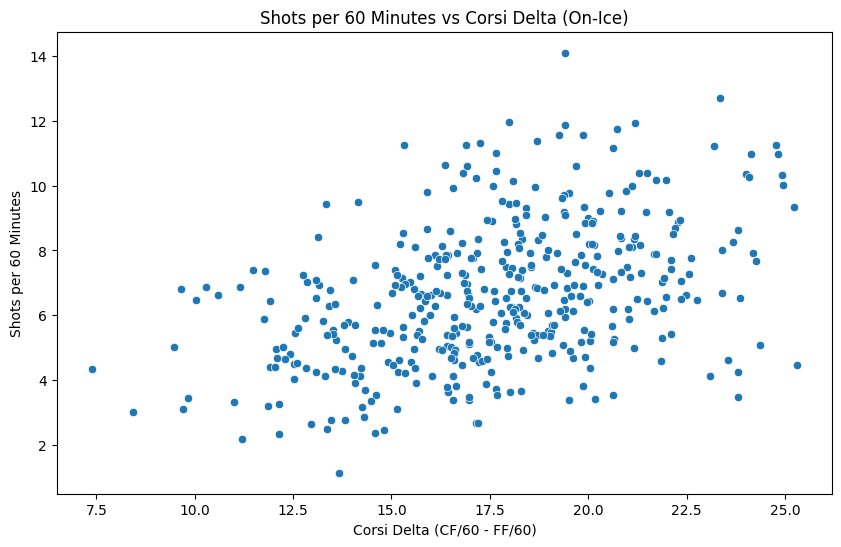

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='cf_delta', y='shots/60')
plt.title('Shots per 60 Minutes vs Corsi Delta (On-Ice)')
plt.xlabel('Corsi Delta (CF/60 - FF/60)')
plt.ylabel('Shots per 60 Minutes')
plt.show()

In [11]:
correlation_icf = merged_df['shots/60'].corr(merged_df['icf_delta'])
print(f"Correlation between 'shots/60' and 'iCF Delta': {correlation_icf:.2f}")

correlation_cf = merged_df['shots/60'].corr(merged_df['cf_delta'])
print(f"Correlation between 'shots/60' and 'CF Delta': {correlation_cf:.2f}")


Correlation between 'shots/60' and 'iCF Delta': 0.56
Correlation between 'shots/60' and 'CF Delta': 0.43


In [13]:
# Check if 'shots/60' exists in the DataFrame
if 'shots/60' in merged_df.columns:
    # Select only numeric columns to avoid ValueError
    numeric_df = merged_df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix using only numeric columns
    correlation_matrix = numeric_df.corr()
else:
    print("The column 'shots/60' does not exist in the DataFrame.")

In [14]:
# Cell in[5]: Extract Correlations with 'shots/60'

if 'shots/60' in merged_df.columns:
    # Extract correlation coefficients for 'shots/60', excluding itself
    shots_corr = correlation_matrix['shots/60'].drop('shots/60').sort_values(ascending=False)
    
    # Display the correlation coefficients
    print("Correlation of each column with 'shots/60':")
    print(shots_corr)

Correlation of each column with 'shots/60':
iff/60                   0.943816
icf/60                   0.902600
iscf/60                  0.793150
ixg/60                   0.744219
sf/60                    0.697866
ff/60                    0.656556
sf%                      0.631090
cf/60                    0.629290
scf/60                   0.610251
xgf/60                   0.608611
ff%                      0.600778
rebounds_created/60      0.589577
xgf%                     0.580933
cf%                      0.574859
scf%                     0.572275
ldcf/60                  0.570181
hdcf/60                  0.569487
mdcf/60                  0.563781
icf_delta                0.556885
ldcf%                    0.540455
goals/60                 0.539780
mdcf%                    0.517896
off. zone_faceoffs/60    0.503560
total_points/60          0.483030
ihdcf/60                 0.479040
off. zone_faceoff_%      0.477039
gf/60                    0.464322
off. zone_starts/60      0.449843
cf_d

In [12]:
# Cell in[6]: Identify Most Correlated Column

if 'shots/60' in df.columns:
    # Find the column with the highest absolute correlation
    most_correlated_col = shots_corr.abs().idxmax()
    highest_corr_value = shots_corr[most_correlated_col]
    
    print(f"\nThe column most correlated with 'shots/60' is '{most_correlated_col}' with a correlation coefficient of {highest_corr_value:.2f}.")


The column most correlated with 'shots/60' is 'iff/60' with a correlation coefficient of 0.96.


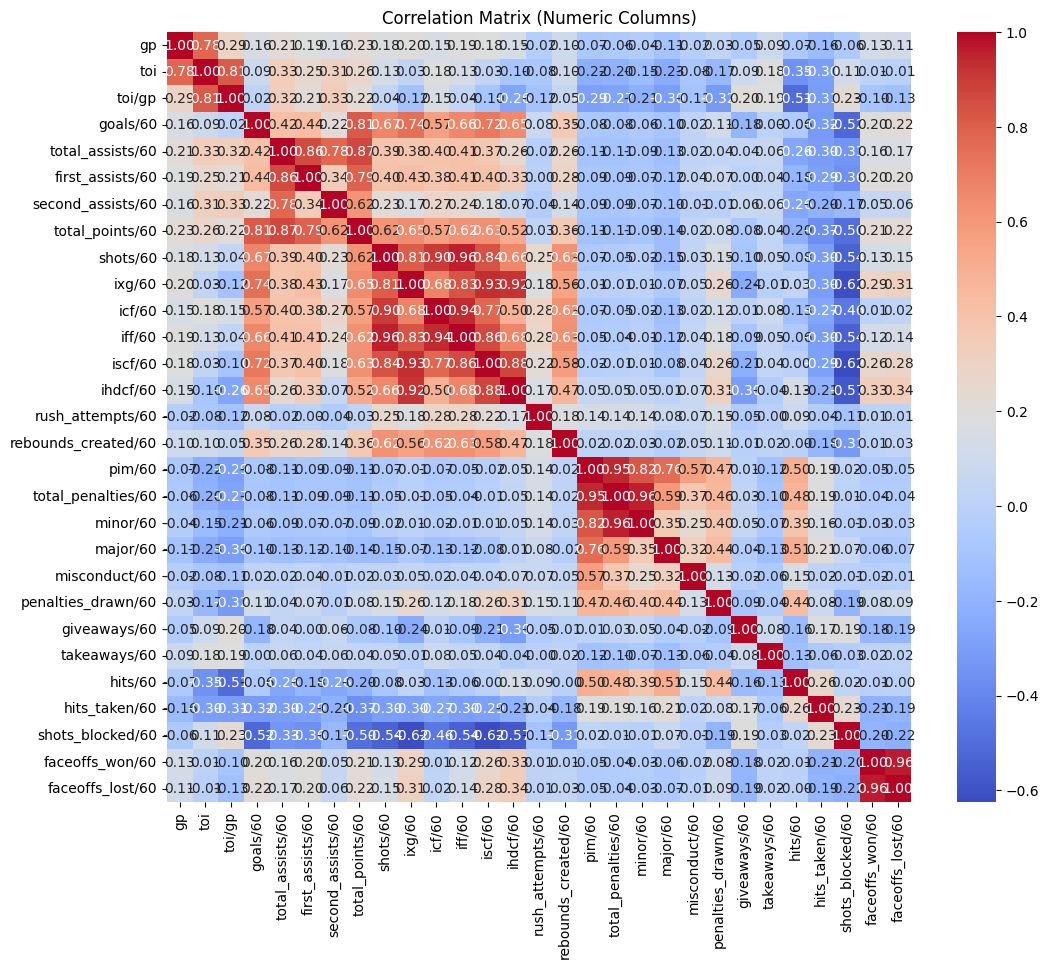

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

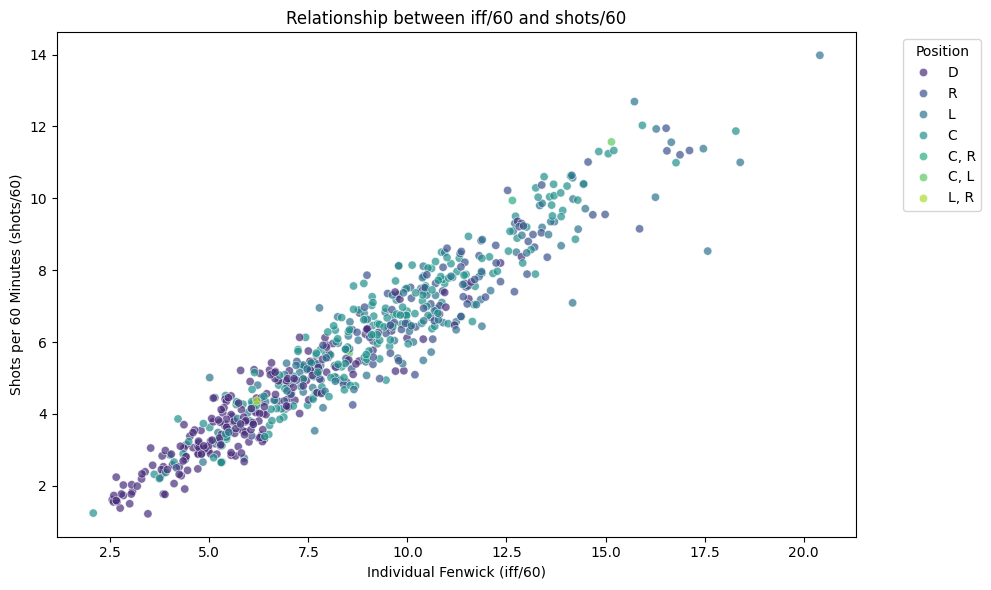

In [15]:

# Ensure that both 'iff/60' and 'shots/60' columns exist in the DataFrame
required_columns = ['iff/60', 'shots/60']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing in the DataFrame: {missing_columns}")
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='iff/60', y='shots/60', hue='position', palette='viridis', alpha=0.7)
    plt.title('Relationship between iff/60 and shots/60')
    plt.xlabel('Individual Fenwick (iff/60)')
    plt.ylabel('Shots per 60 Minutes (shots/60)')
    plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
from nst_scraper import nst_on_ice_scraper

In [21]:
individual_2023_df = nst_on_ice_scraper(fromseason=20232024, thruseason=20232024, startdate='', enddate='', sit='all', stdoi='std', pos='std', rate='y')
individual_2023_df.head()

,player,team,position,gp,toi,toi/gp,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,0.08,0.58,0.27,0.31,0.66,23.29,3.94,1.96,0.15,9.81,6.30,2.67,0.23,0.12,0.62,1.08,0.54,0.54,0.00,0.0,0.00,1.16,0.62,3.32,3.59,4.29,0.00,0.00,-
1,Jeff Carter,PIT,C,72,905.083333,12.570602,0.73,0.27,0.13,0.13,0.99,62.50,5.97,12.22,0.76,11.60,8.88,6.30,3.51,0.60,1.19,0.80,0.40,0.40,0.00,0.0,0.33,1.33,1.52,5.50,2.25,2.19,17.57,10.54,4.14
2,Zach Parise,COL,L,30,389.016667,12.967222,0.77,0.77,0.31,0.46,1.54,76.92,7.71,10.00,0.87,12.03,9.56,7.71,4.63,0.62,2.01,1.23,0.62,0.62,0.00,0.0,0.31,0.62,1.70,3.08,3.39,3.86,2.01,4.63,4.66
3,Brent Burns,CAR,D,82,1763.066667,21.500813,0.34,1.12,0.48,0.65,1.46,35.83,6.30,5.41,0.29,18.24,10.21,4.42,0.41,0.31,1.91,0.61,0.31,0.31,0.00,0.0,0.24,1.91,1.19,1.40,1.29,2.96,0.00,0.00,-
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,1.00,0.83,0.50,0.33,1.83,56.41,6.81,14.63,0.99,11.87,9.96,7.97,4.98,0.33,1.58,3.82,1.41,1.08,0.33,0.0,1.16,1.66,1.25,3.65,5.98,1.41,0.00,0.08,0.00


In [19]:
on_ice_2023_df = nst_on_ice_scraper(fromseason=20232024, thruseason=20232024, startdate='', enddate='', sit='all', stdoi='oi', pos='std', rate='y')
on_ice_2023_df.head()

,player,team,position,gp,toi,toi/gp,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,57.49,59.77,49.03,41.49,43.81,48.64,27.55,29.82,48.01,2.82,2.59,52.14,2.70,2.58,51.12,26.58,26.66,49.93,11.51,10.78,51.65,1.47,1.51,49.35,20.09,21.17,48.69,1.13,1.03,52.38,49.11,55.30,47.03,0.67,0.45,60.00,10.24,91.32,1.016,6.72,11.13,8.96,46.13,42.86,17.23,17.00,21.02,45.05
1,Jeff Carter,PIT,C,72,905.083333,12.570602,53.37,65.63,44.85,37.32,46.07,44.75,25.92,30.10,46.27,1.59,2.39,40.00,2.69,3.18,45.83,23.87,31.02,43.48,10.34,12.33,45.61,0.86,1.26,40.63,18.03,24.93,41.98,0.35,0.71,33.33,42.52,60.90,41.11,0.57,0.86,40.00,6.14,92.07,0.982,5.24,10.61,21.68,51.97,19.46,9.61,14.98,34.67,21.71
2,Zach Parise,COL,L,30,389.016667,12.967222,58.76,66.63,46.86,40.26,47.50,45.87,31.31,33.31,48.45,2.01,3.55,36.11,2.72,3.33,44.98,27.76,28.69,49.18,13.42,13.11,50.58,1.23,2.31,34.78,19.13,20.77,47.94,0.21,0.62,25.00,46.12,60.37,43.31,0.89,0.89,50.00,6.40,89.35,0.958,9.25,12.18,11.41,54.75,44.78,14.96,16.81,21.44,41.10
3,Brent Burns,CAR,D,82,1763.066667,21.500813,76.33,49.31,60.75,53.36,37.26,58.88,35.46,25.93,57.76,4.08,2.72,60.00,3.83,2.87,57.15,35.12,22.80,60.63,14.53,9.84,59.64,2.08,1.16,64.21,27.45,17.29,61.36,1.68,1.27,56.92,67.93,43.01,61.23,0.84,0.54,60.71,11.52,89.50,1.010,10.38,10.41,8.85,39.95,53.98,24.91,17.12,19.91,55.58
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,61.44,51.06,54.61,43.09,38.36,52.91,29.23,26.15,52.77,3.24,3.16,50.65,3.46,2.45,58.52,31.88,23.17,57.92,14.70,10.13,59.20,1.58,1.66,48.72,22.92,17.38,56.87,1.11,1.22,47.62,49.17,41.62,54.16,1.20,0.72,62.50,11.08,87.94,0.990,12.37,10.88,7.31,41.35,62.87,22.75,16.27,14.53,61.02


In [37]:
def merge_dataframes(individual_df, on_ice_df):
    """
    Merges individual and on-ice DataFrames on the 'player' column.

    Parameters:
        individual_df (pd.DataFrame): DataFrame containing individual player statistics.
        on_ice_df (pd.DataFrame): DataFrame containing on-ice player statistics.

    Returns:
        pd.DataFrame: Merged DataFrame.
    """
    merged_df = pd.merge(individual_df, on_ice_df, on='player', suffixes=('_ind', '_oi'))
    return merged_df

# Merge the DataFrames
merged_df = merge_dataframes(individual_2023_df, on_ice_2023_df)
merged_df.head()

,player,team_ind,position_ind,gp_ind,toi_ind,toi/gp_ind,goals/60,total_assists/60,first_assists/60,second_assists/60,total_points/60,ipp,shots/60,sh%,ixg/60,icf/60,iff/60,iscf/60,ihdcf/60,rush_attempts/60,rebounds_created/60,pim/60,total_penalties/60,minor/60,major/60,misconduct/60,penalties_drawn/60,giveaways/60,takeaways/60,hits/60,hits_taken/60,shots_blocked/60,faceoffs_won/60,faceoffs_lost/60,faceoffs_%,team_oi,position_oi,gp_oi,toi_oi,toi/gp_oi,cf/60,ca/60,cf%,ff/60,fa/60,ff%,sf/60,sa/60,sf%,gf/60,ga/60,gf%,xgf/60,xga/60,xgf%,scf/60,sca/60,scf%,hdcf/60,hdca/60,hdcf%,hdgf/60,hdga/60,hdgf%,mdcf/60,mdca/60,mdcf%,mdgf/60,mdga/60,mdgf%,ldcf/60,ldca/60,ldcf%,ldgf/60,ldga/60,ldgf%,on-ice_sh%,on-ice_sv%,pdo,off. zone_starts/60,neu. zone_starts/60,def. zone_starts/60,on the fly_starts/60,off. zone_start_%,off. zone_faceoffs/60,neu. zone_faceoffs/60,def. zone_faceoffs/60,off. zone_faceoff_%
0,Ryan Suter,DAL,D,82,1553.066667,18.939837,0.08,0.58,0.27,0.31,0.66,23.29,3.94,1.96,0.15,9.81,6.30,2.67,0.23,0.12,0.62,1.08,0.54,0.54,0.00,0.0,0.00,1.16,0.62,3.32,3.59,4.29,0.00,0.00,-,DAL,D,82,1553.066667,18.939837,57.49,59.77,49.03,41.49,43.81,48.64,27.55,29.82,48.01,2.82,2.59,52.14,2.70,2.58,51.12,26.58,26.66,49.93,11.51,10.78,51.65,1.47,1.51,49.35,20.09,21.17,48.69,1.13,1.03,52.38,49.11,55.30,47.03,0.67,0.45,60.00,10.24,91.32,1.016,6.72,11.13,8.96,46.13,42.86,17.23,17.00,21.02,45.05
1,Jeff Carter,PIT,C,72,905.083333,12.570602,0.73,0.27,0.13,0.13,0.99,62.50,5.97,12.22,0.76,11.60,8.88,6.30,3.51,0.60,1.19,0.80,0.40,0.40,0.00,0.0,0.33,1.33,1.52,5.50,2.25,2.19,17.57,10.54,4.14,PIT,C,72,905.083333,12.570602,53.37,65.63,44.85,37.32,46.07,44.75,25.92,30.10,46.27,1.59,2.39,40.00,2.69,3.18,45.83,23.87,31.02,43.48,10.34,12.33,45.61,0.86,1.26,40.63,18.03,24.93,41.98,0.35,0.71,33.33,42.52,60.90,41.11,0.57,0.86,40.00,6.14,92.07,0.982,5.24,10.61,21.68,51.97,19.46,9.61,14.98,34.67,21.71
2,Zach Parise,COL,L,30,389.016667,12.967222,0.77,0.77,0.31,0.46,1.54,76.92,7.71,10.00,0.87,12.03,9.56,7.71,4.63,0.62,2.01,1.23,0.62,0.62,0.00,0.0,0.31,0.62,1.70,3.08,3.39,3.86,2.01,4.63,4.66,COL,L,30,389.016667,12.967222,58.76,66.63,46.86,40.26,47.50,45.87,31.31,33.31,48.45,2.01,3.55,36.11,2.72,3.33,44.98,27.76,28.69,49.18,13.42,13.11,50.58,1.23,2.31,34.78,19.13,20.77,47.94,0.21,0.62,25.00,46.12,60.37,43.31,0.89,0.89,50.00,6.40,89.35,0.958,9.25,12.18,11.41,54.75,44.78,14.96,16.81,21.44,41.10
3,Brent Burns,CAR,D,82,1763.066667,21.500813,0.34,1.12,0.48,0.65,1.46,35.83,6.30,5.41,0.29,18.24,10.21,4.42,0.41,0.31,1.91,0.61,0.31,0.31,0.00,0.0,0.24,1.91,1.19,1.40,1.29,2.96,0.00,0.00,-,CAR,D,82,1763.066667,21.500813,76.33,49.31,60.75,53.36,37.26,58.88,35.46,25.93,57.76,4.08,2.72,60.00,3.83,2.87,57.15,35.12,22.80,60.63,14.53,9.84,59.64,2.08,1.16,64.21,27.45,17.29,61.36,1.68,1.27,56.92,67.93,43.01,61.23,0.84,0.54,60.71,11.52,89.50,1.010,10.38,10.41,8.85,39.95,53.98,24.91,17.12,19.91,55.58
4,Corey Perry,"CHI, EDM",R,54,722.633333,13.382099,1.00,0.83,0.50,0.33,1.83,56.41,6.81,14.63,0.99,11.87,9.96,7.97,4.98,0.33,1.58,3.82,1.41,1.08,0.33,0.0,1.16,1.66,1.25,3.65,5.98,1.41,0.00,0.08,0.00,"CHI, EDM",R,54,722.633333,13.382099,61.44,51.06,54.61,43.09,38.36,52.91,29.23,26.15,52.77,3.24,3.16,50.65,3.46,2.45,58.52,31.88,23.17,57.92,14.70,10.13,59.20,1.58,1.66,48.72,22.92,17.38,56.87,1.11,1.22,47.62,49.17,41.62,54.16,1.20,0.72,62.50,11.08,87.94,0.990,12.37,10.88,7.31,41.35,62.87,22.75,16.27,14.53,61.02


In [33]:
# Columns from on_ice_2023_df
on_ice_columns = ['cf/60', 'ca/60', 'ff/60', 'fa/60', 'sf/60', 'sa/60']

# Ensure 'shots/60' exists after merge
if 'shots/60' not in merged_df.columns:
    raise ValueError("Column 'shots/60' not found in individual_2023_df after merging.")

# Select relevant columns
correlation_df = merged_df[['shots/60'] + on_ice_columns]
correlation_df.head()

,shots/60,cf/60,ca/60,ff/60,fa/60,sf/60,sa/60
0,3.94,57.49,59.77,41.49,43.81,27.55,29.82
1,5.97,53.37,65.63,37.32,46.07,25.92,30.10
2,7.71,58.76,66.63,40.26,47.50,31.31,33.31
3,6.30,76.33,49.31,53.36,37.26,35.46,25.93
4,6.81,61.44,51.06,43.09,38.36,29.23,26.15


In [35]:
def calculate_correlations(df, target_column, feature_columns):
    """
    Calculates Pearson correlation coefficients between the target column and feature columns.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        target_column (str): The column to correlate with.
        feature_columns (list): List of columns to compute correlation with the target.

    Returns:
        pd.Series: Correlation coefficients.
    """
    correlations = df[feature_columns].corrwith(df[target_column])
    return correlations

# Calculate correlations
correlations = calculate_correlations(correlation_df, 'shots/60', on_ice_columns)
print("Correlation coefficients with 'shots/60':")
print(correlations)

Correlation coefficients with 'shots/60':
cf/60    0.537578
ca/60   -0.299906
ff/60    0.512594
fa/60   -0.223440
sf/60    0.474760
sa/60   -0.162383
dtype: float64
